# 1. Data Collection and Storing 

In [1]:
import yfinance as yf
import pandas as pd 
import os

# step 0: create a directory to store the data
if not os.path.exists("data"):
    os.makedirs("data")


# step 1: user input for stock ticker and date range
ticker = input("Enter the stock ticker symbol(e.g AAPL , RELIANCE.NS):  ").strip().upper()
start_date = input("ENTER START DATE (YYYY-MM-DD): ") or "2010-01-01"
end_date = input("ENTER END DATE (YYYY-MM-DD): ") or "2023-10-01"

# step 2: fetch the data using yfinance
data = yf.download(ticker, start=start_date, end=end_date)

# Fix: Reset index and ensure 'Date' is datetime
data.reset_index(inplace=True)
data['Date'] = pd.to_datetime(data['Date'])

# step 3: save the data to a CSV file
if not data.empty:
    data.to_csv(f"data/{ticker}_data.csv")
    print(f"Data for {ticker} from {start_date} to {end_date} saved to data/{ticker}_data.csv") 
else:
    print(f"No data found for {ticker} in the specified date range.")

# step 4: display the first few rows of the data
print("First few rows of the data:")
print(data.head(100))

C:\Users\DELL\AppData\Local\Temp\ipykernel_25592\4289858937.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Data for ITC.NS from 2010-01-01 to 2023-10-01 saved to data/ITC.NS_data.csv
First few rows of the data:
Price        Date      Close       High        Low       Open    Volume
Ticker                ITC.NS     ITC.NS     ITC.NS     ITC.NS    ITC.NS
0      2010-01-04  56.438210  56.738588  55.703941  56.293581   5161635
1      2010-01-05  56.994465  57.127970  56.226824  56.694086  10767225
2      2010-01-06  57.127968  57.561847  56.427077  57.561847   7529979
3      2010-01-07  56.949966  57.517351  56.449332  57.183595   4987434
4      2010-01-08  57.072346  57.517353  56.816467  56.816467   4881351
..            ...        ...        ...        ...        ...       ...
95     2010-05-25  57.962364  60.120653  57.561852  59.519891  21123138
96     2010-05-26  59.875896  60.065025  58.095864  58.307242  11092257
97     2010-05-27  61.388927  61.989690  59.475389  59.964902  29180253
98     2010-05-28  63.013199  63.191200  61.388917  61.856174  16856175
99     2010-05-31  63.013199  64

# 2. Data Cleaning and Handling Missing values

In [2]:
import pandas as pd

# Create file path dynamically
file_path = f"data/{ticker}_data.csv"

# Load your data 
data = pd.read_csv(file_path)

# Drop any missing values
data.dropna(inplace = True)

# Show updated data
data.head(100)

,Price,Date,Close,High,Low,Open,Volume
1,0,2010-01-04,56.438209533691406,56.73858825796972,55.70394137617816,56.29358142018594,5161635
2,1,2010-01-05,56.99446487426758,57.12797048597666,56.22682415827506,56.69408616017929,10767225
3,2,2010-01-06,57.127967834472656,57.561847047413856,56.42707741050621,57.561847047413856,7529979
4,3,2010-01-07,56.94996643066406,57.517351292681866,56.44933183016861,57.183594892351564,4987434
5,4,2010-01-08,57.07234573364258,57.51735257980181,56.81646717905492,56.81646717905492,4881351
...,...,...,...,...,...,...,...
96,95,2010-05-25,57.962364196777344,60.12065324528967,57.561852435467856,59.51989069604402,21123138
97,96,2010-05-26,59.87589645385742,60.065024742054874,58.09586400825837,58.307242383730895,11092257
98,97,2010-05-27,61.3889274597168,61.98968999774055,59.47538940998133,59.96490151234087,29180253
99,98,2010-05-28,63.01319885253906,63.19119952013483,61.38891729713939,61.85617414229594,16856175


In [3]:
# Inspect the raw data

print("Data Summary:")
data.info()  # structure of data

print("\n First few rows:")
print(data.head()) 

print("\n Any missing values:")
print(data.isnull().sum())  # count NaNs in each column

print("\n Description of data:")
print(data.describe())

print("\n Checking duplicated and sum:")
print(data.duplicated().sum())


# Drop rows with any missing data (if any)
data.dropna(inplace=True)
data.reset_index(inplace=True)  # move 'Date' from index to column
print(f" Cleaned data shape: {data.shape}")


Data Summary:
<class 'pandas.core.frame.DataFrame'>
Index: 3394 entries, 1 to 3394
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   3394 non-null   object
 1   Date    3394 non-null   object
 2   Close   3394 non-null   object
 3   High    3394 non-null   object
 4   Low     3394 non-null   object
 5   Open    3394 non-null   object
 6   Volume  3394 non-null   object
dtypes: object(7)
memory usage: 212.1+ KB

 First few rows:
  Price        Date               Close                High  \
1     0  2010-01-04  56.438209533691406   56.73858825796972   
2     1  2010-01-05   56.99446487426758   57.12797048597666   
3     2  2010-01-06  57.127967834472656  57.561847047413856   
4     3  2010-01-07   56.94996643066406  57.517351292681866   
5     4  2010-01-08   57.07234573364258   57.51735257980181   

                 Low                Open    Volume  
1  55.70394137617816   56.29358142018594   5161635  
2  56.2268241582

In [4]:
pip install ta

Note: you may need to restart the kernel to use updated packages.


# 3. Add Technical indicators for predictions

# Indicator	- Why it helps?
# SMA - is the average price of a stock. (Simple Moving Average)
# EMA - it gives more weight to recent prices. (Exponential Moving Average)
# RSI	- Detects overbought/oversold levels (Relative Strength Index)
# MACD	- Moving Average Convergence Divergence, calculates the diff b/w two moving averages(MA) to identify buy and sell signals
# Bollinger Bands	- Volatility + range

In [5]:
data.columns

Index(['index', 'Price', 'Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

# A. Feature Engineering

In [6]:
# Fix: Remove any existing duplicate index columns first
if 'level_0' in data.columns:
    data.drop(columns=['level_0'], inplace=True)
if 'index' in data.columns:
    data.drop(columns=['index'], inplace=True)

# Force reset the index safely (no duplicates like 'level_0')
data.reset_index(inplace=True)

# Convert price-related columns to float
price_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in price_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with invalid values
data.dropna(inplace=True)

# Feature Engineering
data['Daily_Return'] = data['Close'].pct_change()
data['MA_7'] = data['Close'].rolling(window=7).mean()
data['MA_21'] = data['Close'].rolling(window=21).mean()
data['Volatility_7'] = data['Daily_Return'].rolling(window=7).std()
data['Prev_Close'] = data['Close'].shift(1)

# RSI Feature
delta = data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['RSI_14'] = 100 - (100 / (1 + rs))

# MACD Feature
ema_12 = data['Close'].ewm(span=12, adjust=False).mean()
ema_26 = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = ema_12 - ema_26
data['MACD_Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Drop any new NaNs from feature creation
data.dropna(inplace=True)

if 'Date' not in data.columns:
    data['Date'] = pd.to_datetime(data.index)
    
# Preview enhanced data
print("\n Enhanced Data Preview:")
print(data[['Date', 'Close', 'Daily_Return', 'MA_7', 'MA_21', 'Volatility_7', 'Prev_Close']].head(100))



 Enhanced Data Preview:
           Date      Close  Daily_Return       MA_7      MA_21  Volatility_7  \
20   2010-02-02  54.380043     -0.008519  55.797715  55.975187      0.015974   
21   2010-02-03  56.204578      0.033552  55.908967  55.964061      0.019452   
22   2010-02-04  56.371445      0.002969  55.853337  55.934394      0.016962   
23   2010-02-05  55.258919     -0.019736  55.613349  55.845391      0.018220   
24   2010-02-08  54.591408     -0.012080  55.330449  55.733079      0.018462   
..          ...        ...           ...        ...        ...           ...   
115  2010-06-22  68.211327      0.009027  66.461333  63.925151      0.007687   
116  2010-06-23  68.448654      0.003479  67.002156  64.424498      0.007484   
117  2010-06-24  69.104103      0.009576  67.455802  64.863936      0.005686   
118  2010-06-25  68.132210     -0.014064  67.796436  65.185045      0.009300   
119  2010-06-28  67.273369     -0.012606  67.917514  65.387910      0.011046   

     Prev_Clos

In [7]:
print(data['Date'].head())
print(data['Date'].dtype)


20    2010-02-02
21    2010-02-03
22    2010-02-04
23    2010-02-05
24    2010-02-08
Name: Date, dtype: object
object


# 4. Data visualization:
# -Stock closing price over time

# -Moving averages (7-day and 21-day)

# 3-Daily returns distribution

# -Volatility over time

# -Correlation heatmap

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# A. Line Plot of Closing Price + Moving Averages

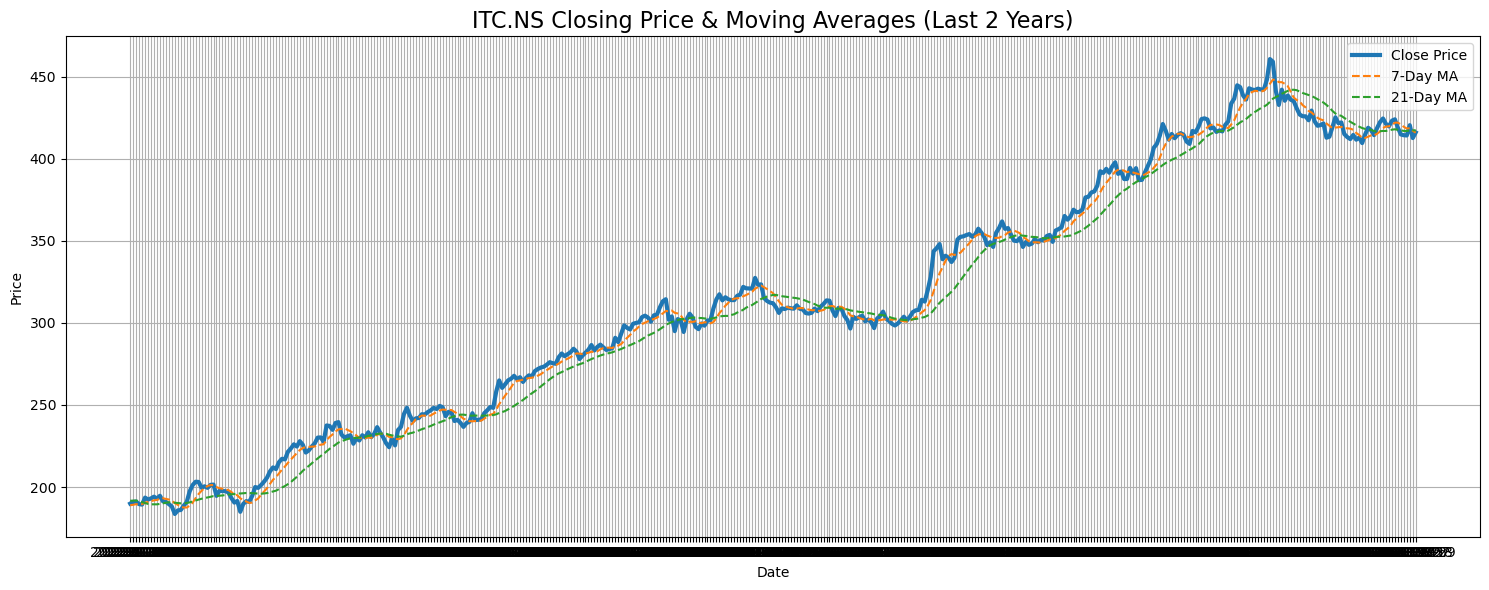

In [9]:
# Improved Line Plot - Focused on recent 2 years with average crossover
recent_data = data = data[data['Date'] >='2022-01-01']

# Plot Close, MA_7, and MA_21
plt.figure(figsize=(15, 6))
plt.plot(recent_data['Date'], recent_data['Close'], label='Close Price', linewidth=3)
plt.plot(recent_data['Date'], recent_data['MA_7'], label='7-Day MA', linestyle='--')
plt.plot(recent_data['Date'], recent_data['MA_21'], label='21-Day MA', linestyle='--')
plt.title(f"{ticker} Closing Price & Moving Averages (Last 2 Years)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# B. Daily Return Distribution (Histogram)

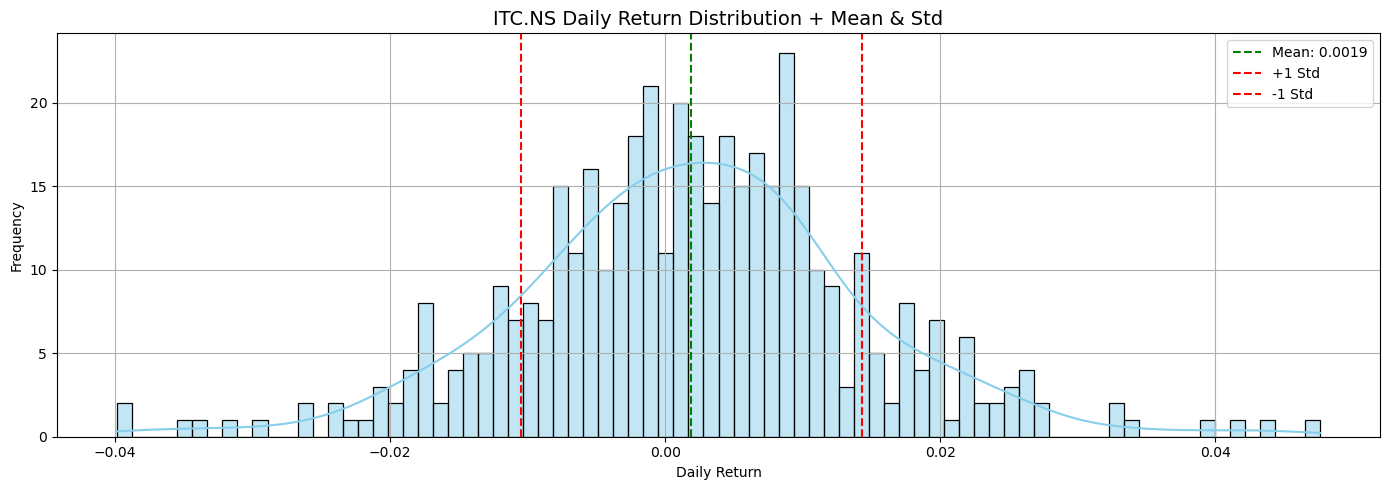

In [10]:
# B. Improved Return Histogram with mean and std lines
mean = data['Daily_Return'].mean()
std = data['Daily_Return'].std()

plt.figure(figsize=(14, 5))
sns.histplot(data['Daily_Return'], bins=80, kde=True, color='skyblue')

plt.axvline(mean, color='green', linestyle='--', label=f"Mean: {mean:.4f}")
plt.axvline(mean + std, color='red', linestyle='--', label=f"+1 Std")
plt.axvline(mean - std, color='red', linestyle='--', label=f"-1 Std")

plt.title(f"{ticker} Daily Return Distribution + Mean & Std", fontsize=14)
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# C. Volatility over time

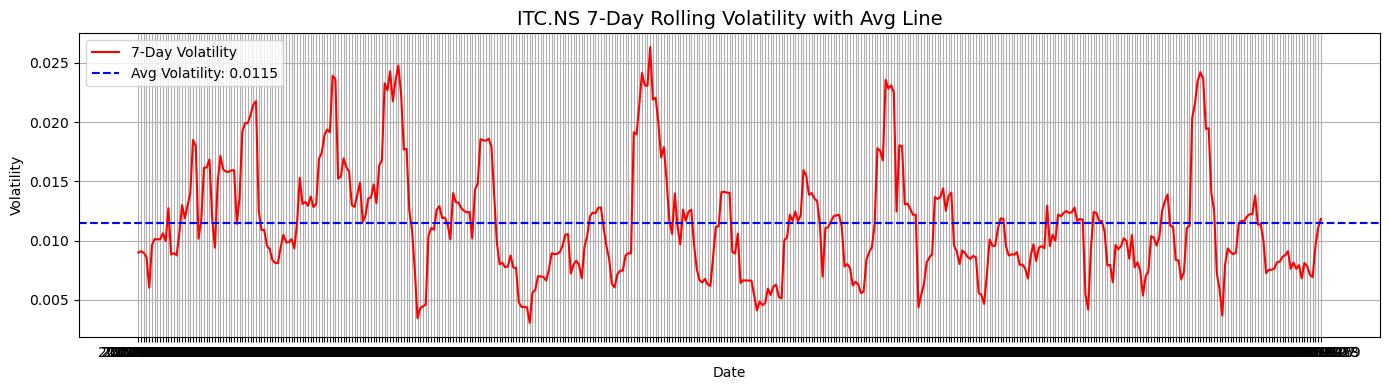

In [11]:
# C. Improved Volatility Plot with Average Line
avg_vol = data['Volatility_7'].mean()

plt.figure(figsize=(14, 4))
plt.plot(data['Date'], data['Volatility_7'], color='red', label='7-Day Volatility')

plt.axhline(avg_vol, color='blue', linestyle='--', label=f'Avg Volatility: {avg_vol:.4f}')

plt.title(f"{ticker} 7-Day Rolling Volatility with Avg Line", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# D. Correlation Heatmap

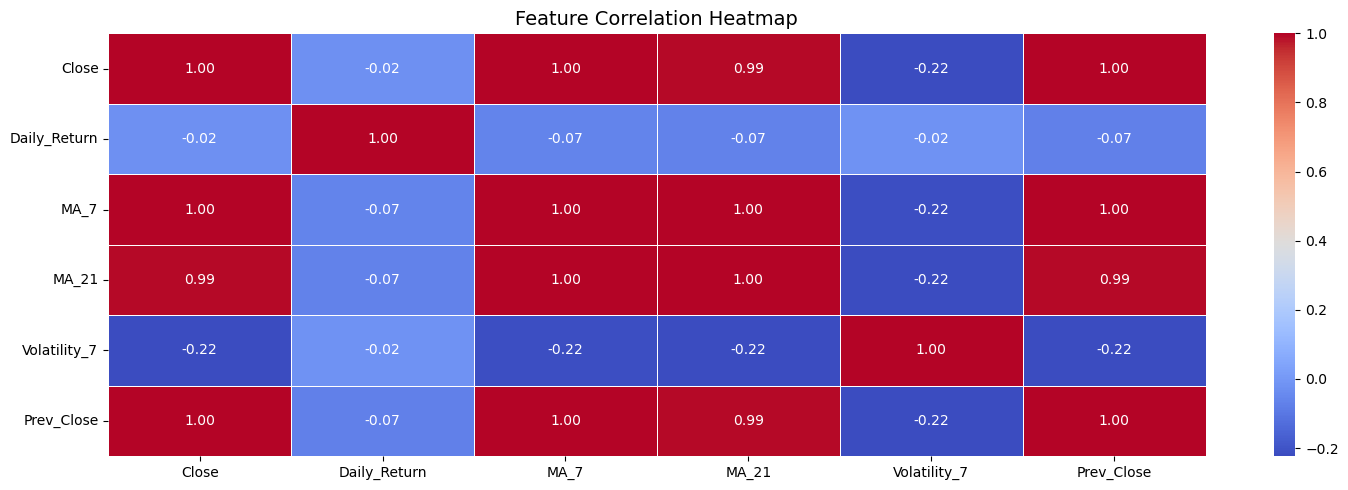

In [12]:
plt.figure(figsize=(15, 5))

# sns.heatmap(data[['Close', 'Daily_Return', 'MA_7', 'MA_21', 'Volatility_7', 'Prev_Close']].corr(), 
            # annot=True, cmap='coolwarm', fmt=".2f")

sns.heatmap(data[['Close', 'Daily_Return', 'MA_7', 'MA_21', 'Volatility_7', 'Prev_Close']].corr(), 
    annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, linecolor='white')

plt.title("Feature Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()


# E. RSI Visualization

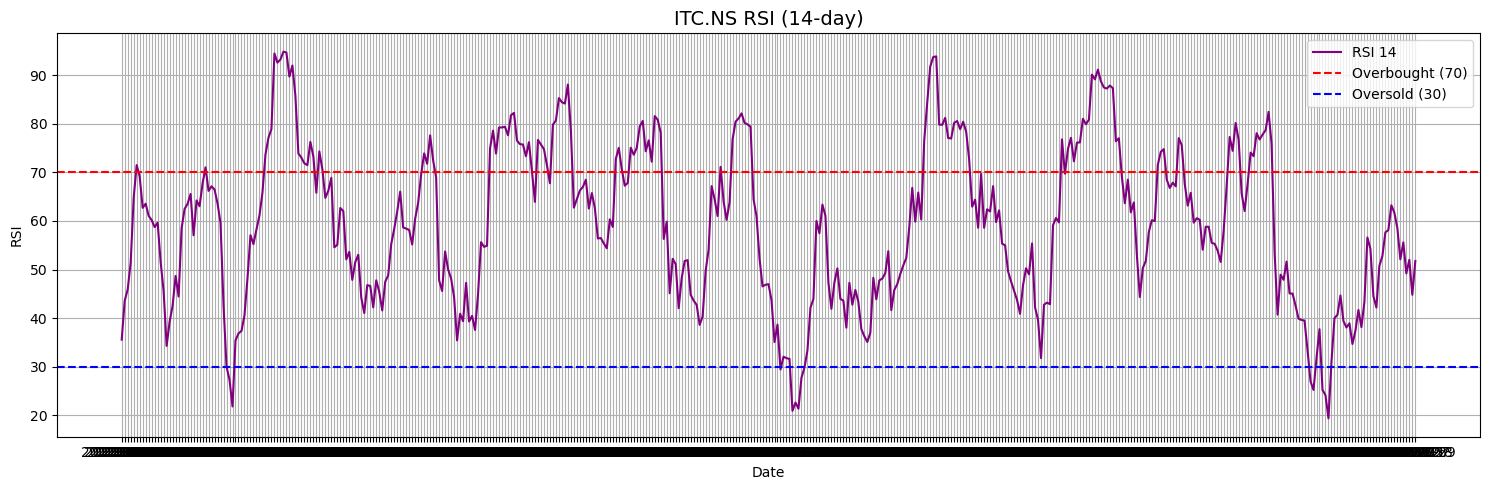

In [13]:
plt.figure(figsize=(15, 5))
plt.plot(data['Date'], data['RSI_14'], label='RSI 14', color='purple')
plt.axhline(70, linestyle='--', color='red', label='Overbought (70)')
plt.axhline(30, linestyle='--', color='blue', label='Oversold (30)')
plt.title(f'{ticker} RSI (14-day)', fontsize=14)
plt.xlabel("Date")
plt.ylabel("RSI")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# F. MACD Visualization

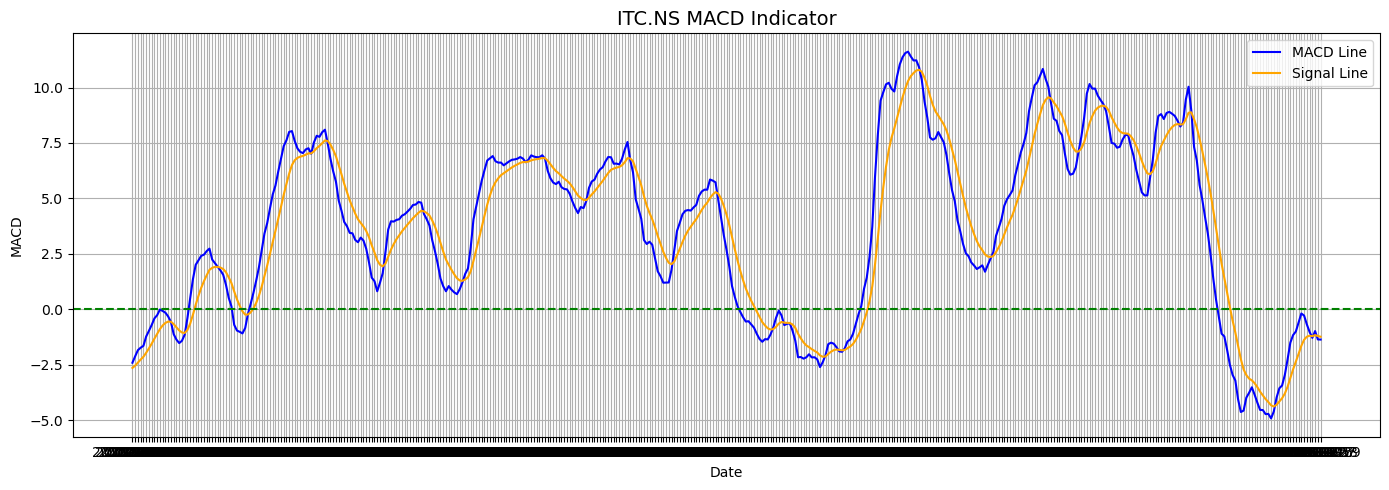

In [14]:
plt.figure(figsize=(14, 5))
plt.plot(data['Date'], data['MACD'], label='MACD Line', color='blue')
plt.plot(data['Date'], data['MACD_Signal'], label='Signal Line', color='orange')
plt.axhline(0, linestyle='--', color='green')
plt.title(f'{ticker} MACD Indicator', fontsize=14)
plt.xlabel("Date")
plt.ylabel("MACD")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


# G. Updated Correlation Heatmap

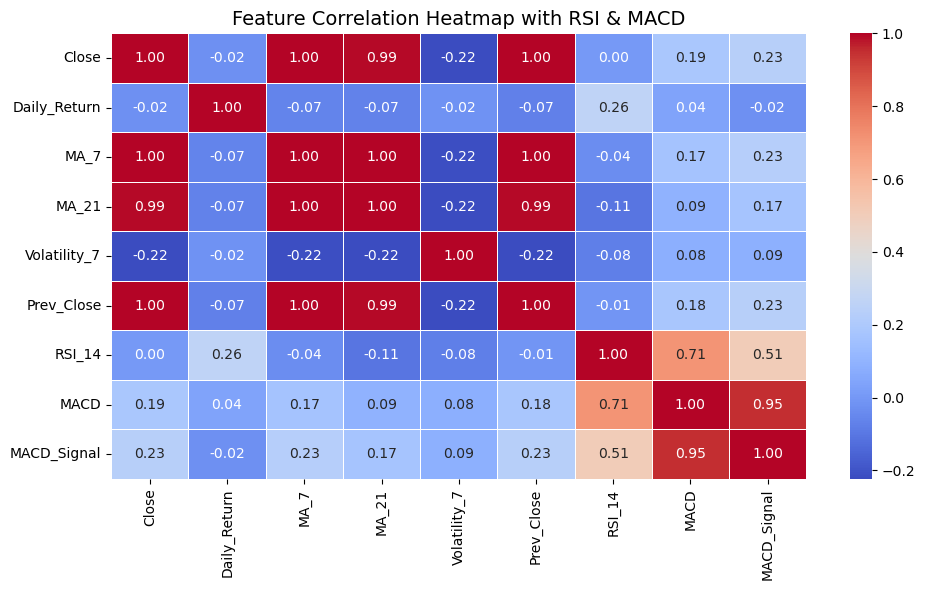

In [15]:
plt.figure(figsize=(10, 6)) 

sns.heatmap(data[['Close', 'Daily_Return', 'MA_7', 'MA_21', 'Volatility_7', 'Prev_Close', 'RSI_14', 'MACD', 'MACD_Signal']].corr(), 
    annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, linecolor='white')

plt.title("Feature Correlation Heatmap with RSI & MACD", fontsize=14)
plt.tight_layout()
plt.show()


# 5. Model Building

# Goal: Predict Next-Day Closing Price

# Prepare data

# Create features and target

# Train-test split

# Train Linear Regression model

# Evaluate performance (RMSE, MAE, R²)

# Plot Actual vs Predicted price

In [16]:
# Step 1: Prepare the Data
data.head()


,index,Price,Date,Close,High,Low,Open,Volume,Daily_Return,MA_7,MA_21,Volatility_7,Prev_Close,RSI_14,MACD,MACD_Signal
2961,2961,2961,2022-01-03,189.924469,190.574598,188.147446,189.014285,7765495,0.004816,188.909010,191.645739,0.009005,189.014267,35.562389,-2.414342,-2.648287
2962,2962,2962,2022-01-04,190.921280,192.178194,189.881076,190.271151,9050253,0.005248,189.187633,191.742740,0.009112,189.924469,43.559267,-2.119970,-2.542624
2963,2963,2963,2022-01-05,191.181366,192.004860,189.534364,190.401203,11230588,0.001362,189.559137,191.738613,0.008980,190.921280,45.898834,-1.844430,-2.402985
2964,2964,2964,2022-01-06,189.577713,191.051337,189.144293,189.837767,8950589,-0.008388,189.391959,191.480625,0.008611,191.181366,51.467745,-1.735459,-2.269480
2965,2965,2965,2022-01-07,189.317642,191.268030,188.537492,190.531225,8855041,-0.001372,189.596285,190.778899,0.006033,189.577713,64.778262,-1.651052,-2.145794


In [17]:
data.columns

Index(['index', 'Price', 'Date', 'Close', 'High', 'Low', 'Open', 'Volume',
       'Daily_Return', 'MA_7', 'MA_21', 'Volatility_7', 'Prev_Close', 'RSI_14',
       'MACD', 'MACD_Signal'],
      dtype='object')

In [18]:
# Step 2: Define Features (X) and Target (y)
# We want to predict tomorrow's close price, so we-

# Shift target column to predict next day's price
data['Target'] = data['Close'].shift(-1)

# Drop last row (because it has NaN in Target after shift)
data.dropna(inplace=True)

# Define features and target
features = ['Close', 'Prev_Close', 'MA_7', 'MA_21', 'Volatility_7', 'RSI_14', 'MACD', 'MACD_Signal']
X = data[features]
y = data['Target']


In [19]:
# Step 3: Split the data (Train/Test)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [20]:
# Step 4: Train Linear Regression Model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [21]:
# Step 5: Make Predictions and Evaluate:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Model Performance:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"R² Score: {r2:.4f}")


✅ Model Performance:
RMSE: 4.9711
MAE:  3.9042
R² Score: 0.8142


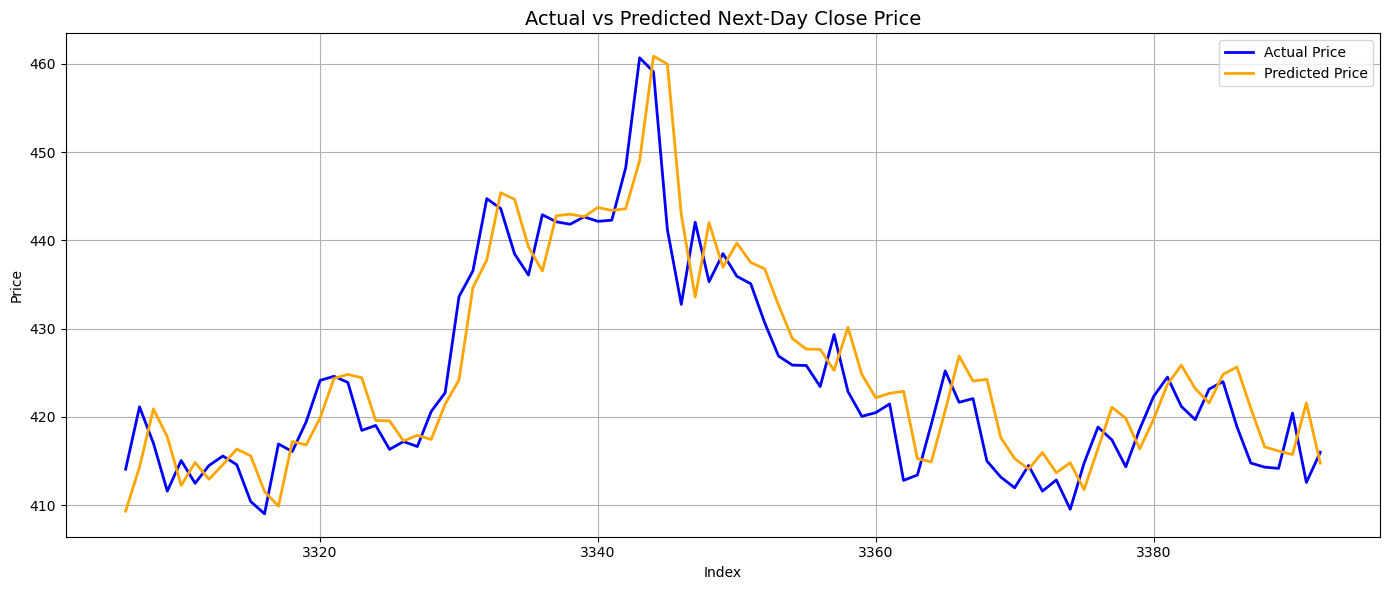

In [22]:
# Step 6: Visualizeation Actual vs Predicted Values

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test, label='Actual Price', linewidth=2, color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Price', linewidth=2, color='orange')
plt.title("Actual vs Predicted Next-Day Close Price", fontsize=14)
plt.xlabel("Index")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 6. Random Forest Regression Model to predict the next day’s stock price and compare it with your Linear Regression model.

In [23]:
# Step 1: import libraries
from sklearn.ensemble import RandomForestRegressor


In [24]:
# step 2: Prepare Features and Targets

# Recreate the Target Column
data['Target'] = data['Close'].shift(-1)

# Drop any rows with NaNs in either features or target
data.dropna(subset=features + ['Target'], inplace=True)

# Define features and target again
X = data[features]
y = data['Target']



In [25]:
# Step 2.1:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [26]:
# Step 3: Train Random Forest Model

# Train Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)





RandomForestRegressor(random_state=42)

In [27]:
# Step 4: Make Predictions:
y_pred_rf = rf_model.predict(X_test)



In [28]:
# Step 5: Evaluate The Model

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"📊 Random Forest Performance:")
print(f"RMSE: {rmse_rf:.4f}")
print(f"MAE:  {mae_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")



📊 Random Forest Performance:
RMSE: 26.6608
MAE:  24.1198
R² Score: -4.2689


In [29]:
# Step 6: Compare with linear regression model

print("\n🔍 Model Comparison:")
print(f"Linear Regression RMSE: {rmse:.4f} | R²: {r2:.4f}")
print(f"Random Forest    RMSE: {rmse_rf:.4f} | R²: {r2_rf:.4f}")



🔍 Model Comparison:
Linear Regression RMSE: 4.9711 | R²: 0.8142
Random Forest    RMSE: 26.6608 | R²: -4.2689


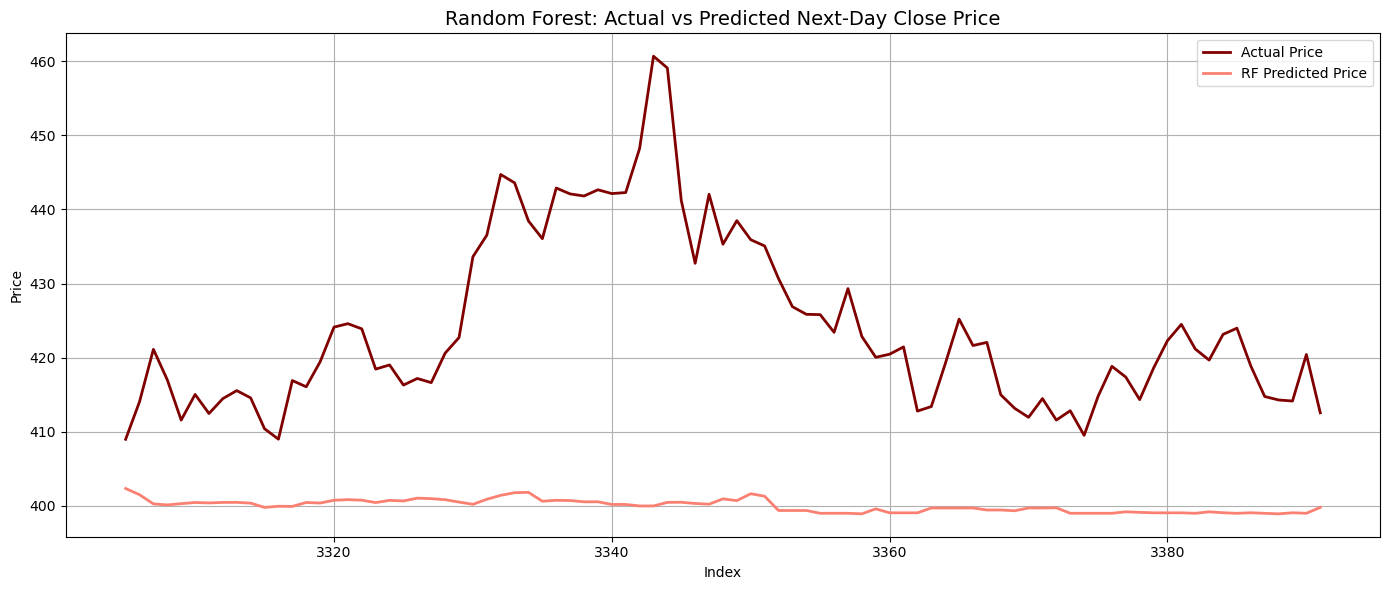

In [30]:
# Step 7: Plot Actual vs Predicted (Random Forest)

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test, label='Actual Price', linewidth=2, color='maroon')
plt.plot(y_test.index, y_pred_rf, label='RF Predicted Price', linewidth=2,color='salmon')
plt.title("Random Forest: Actual vs Predicted Next-Day Close Price", fontsize=14)
plt.xlabel("Index")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 7. Build Classification model

# Our Goal: Predict a binary signal:

# 1 → Tomorrow’s price will go up

# 0 → Tomorrow’s price will go down or stay same

In [31]:
# Step 1: Create target signal columns(Up/Down)

# 1 if tomorrow's price is higher than today, else 0
data['Signal'] = (data['Close'].shift(-1) > data['Close']).astype(int)


In [32]:
# Step 2: Drop NaNs

data.dropna(subset=features + ['Signal'], inplace=True)

X_class = data[features]
y_class = data['Signal']


In [33]:
# Step 3: Train-Test Split

from sklearn.model_selection import train_test_split

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class, y_class, test_size=0.2, shuffle=False)


In [34]:
# Step 4: Train Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_c, y_train_c)


RandomForestClassifier(random_state=42)

In [35]:
# Step 5: Predict and Evaluate

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred_c = clf.predict(X_test_c)

print("-----Classification Metrics-----")
print(f"Accuracy:  {accuracy_score(y_test_c, y_pred_c):.4f}")
print(f"Precision: {precision_score(y_test_c, y_pred_c):.4f}")
print(f"Recall:    {recall_score(y_test_c, y_pred_c):.4f}")
print(f"F1 Score:  {f1_score(y_test_c, y_pred_c):.4f}")


-----Classification Metrics-----
Accuracy:  0.4713
Precision: 0.4706
Recall:    0.9756
F1 Score:  0.6349


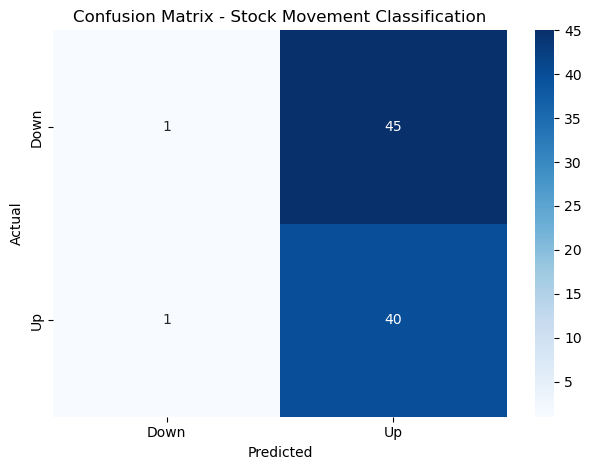

In [36]:
# Step 6: Plot Confusion Matrix

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test_c, y_pred_c)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Down", "Up"], yticklabels=["Down", "Up"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Stock Movement Classification")
plt.tight_layout()
plt.show()


# 8.  Visualize the Predicted Signals on Stock Price Chart

# Shows actual value of your classifier

# Converts "1" → Buy Signal, "0" → Sell Signal

# Looks amazing in dashboards and reports

# Makes it ready for presentation or deployment

In [37]:
# Step 1: Add a .reset_index() to keep track

# Add original index before splitting (to map back later)
X_class = data[features].copy()
y_class = data['Signal'].copy()
X_class['Original_Index'] = X_class.index



In [38]:
# Step 2: Split the Data (same as before)

from sklearn.model_selection import train_test_split

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class, y_class, test_size=0.2, shuffle=False)


In [39]:
# Step 3: After predicting, map everything properly

# Predict classification
y_pred_c = clf.predict(X_test_c[features])  # only features for prediction

# Restore index to merge with full data
X_test_c = X_test_c.reset_index(drop=True)

# Add predictions and actuals
X_test_c['Predicted_Signal'] = y_pred_c
X_test_c['Actual_Signal'] = y_test_c.values

# Map 'Date' and 'Close' from original data using Original_Index
X_test_c['Date'] = data.loc[X_test_c['Original_Index'], 'Date'].values
X_test_c['Close'] = data.loc[X_test_c['Original_Index'], 'Close'].values

data.reset_index(inplace=True)  # only if needed




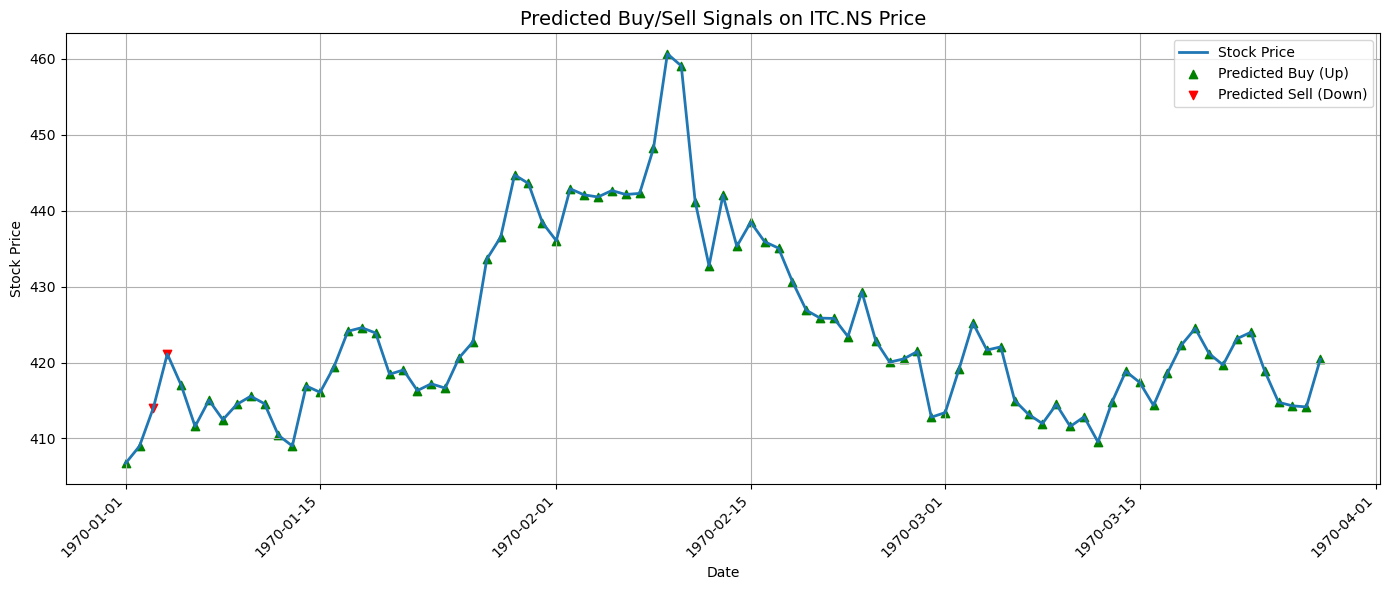

In [40]:
# Step 4: Plot Buy/Sell Signals

import matplotlib.pyplot as plt
import matplotlib.dates as mdates


plt.figure(figsize=(14, 6))
plt.plot(X_test_c['Date'], X_test_c['Close'], label='Stock Price', linewidth=2)

# Plot predicted buy/sell points
buy_signals = X_test_c[X_test_c['Predicted_Signal'] == 1]
sell_signals = X_test_c[X_test_c['Predicted_Signal'] == 0]

plt.scatter(buy_signals['Date'], buy_signals['Close'], label='Predicted Buy (Up)', marker='^', color='green')
plt.scatter(sell_signals['Date'], sell_signals['Close'], label='Predicted Sell (Down)', marker='v', color='red')

# Format x-axis dates
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45, ha='right')

plt.title(f"Predicted Buy/Sell Signals on {ticker} Price", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
